# Bài kiểm tra cuối môn: LDS3 
### Cho dữ liệu housing-prices-dataset/train.csv
### Yêu cầu: Thực hiện các công việc sau
1. Xác định các thuộc tính
2. Phân tích đơn biến  
   Để dự đoán giá nhà, giả sử cần các thông tin sau: 'LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 
   'TotRmsAbvGrd' => phân tích các biến này
3. Phân tích hai biến
4. Xử lý dữ liệu thiếu
5. Phát hiện và xử lý ngoại lệ

In [1]:
# link: https://www.kaggle.com/alphaepsilon/housing-prices-dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [3]:
df = pd.read_csv("housing-prices-dataset/train.csv")
df.shape

(1460, 81)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 1. Xác định các thuộc tính
1. Input: Tất cả ngoại trừ SalePrice
2. Output: SalePrice
3. Type of variable: <br/>
    3.1 Predictor: khác SalePrice <br/>
    3.2 Target: SalePrice <br/>
4. Data Type: <br/>
    4.1 Charactor/String <br/>
    4.2 Numeric <br/>
5. Variable Category:<br/>
    5.1 Categorical: kieu so, kieu chuoi  <br/>
    5.2 Continuous: int, float

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [9]:
#Tạo danh sách các cột kiểu số 
numbers = [f for f in df.columns if df.dtypes[f] != 'object'] # Quantitative: # du lieu kieu so
list_nums = ', '.join(numbers)
list_nums

'Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SalePrice'

In [10]:
# Tạo danh sách cột kiểu chuỗi
objects = [f for f in df.columns if df.dtypes[f] == 'object'] # Qualitative : # du lieu kieu chuoi
list_obj = ', '.join(objects)
list_obj

'MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition'

In [11]:
# Categorical: 
# Duyệt qua các biến chuỗi, in ra các giá trị có trong mỗi biến -->  xem xet cac bien phan loai kieu chuoi
# Với kết quả in ra, xác định các biến kiểu số thuộc loại Categorical 
i = 1
for obj in objects:
    print(i, "/", obj, "\t",len(df[obj].unique()),":", df[obj].unique())
    i = i+1

1 / MSZoning 	 5 : ['RL' 'RM' 'C (all)' 'FV' 'RH']
2 / Street 	 2 : ['Pave' 'Grvl']
3 / Alley 	 3 : [nan 'Grvl' 'Pave']
4 / LotShape 	 4 : ['Reg' 'IR1' 'IR2' 'IR3']
5 / LandContour 	 4 : ['Lvl' 'Bnk' 'Low' 'HLS']
6 / Utilities 	 2 : ['AllPub' 'NoSeWa']
7 / LotConfig 	 5 : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
8 / LandSlope 	 3 : ['Gtl' 'Mod' 'Sev']
9 / Neighborhood 	 25 : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
10 / Condition1 	 9 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
11 / Condition2 	 8 : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
12 / BldgType 	 5 : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
13 / HouseStyle 	 8 : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
14 / RoofStyle 	 6 : ['Gable' 'Hip' 'Gambrel

In [12]:
# Duyệt qua các biến kiểu số in ra các giá trị phân biệt có trong cột (chỉ in các giá trị khi số giá trị phân biệt nhỏ hơn 120)
# Với kết quả in ra, xác định các biến kiểu số thuộc loại Categorical 
i = 1
for obj in numbers:
    print(i, "/", obj, "\t",len(df[obj].unique()),":", df[obj].unique() if len(df[obj].unique())<120 else '')
    i = i+1

1 / Id 	 1460 : 
2 / MSSubClass 	 15 : [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
3 / LotFrontage 	 111 : [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
4 / LotArea 	 1073 : 
5 / OverallQual 	 10 : [ 7  6  8  5  9  4 10  3  1  2]
6 / OverallCond 	 9 : [5 8 6 7 4 2 3 9 1]
7 / YearBuilt 	 112 : [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 19

- Quan sát 2 kết quả trên để kết luận, xác định tập features. Trong phần tiếp theo giả sử chúng ta chỉ làm việc với các 

# features = 'LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd'   

## 2. Phân tích đơn biến

In [13]:
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']

### 2.1. Với mỗi biến continuous. Hãy thực hiện các yêu cầu sau: 
- Vẽ đồ thị gồm 2 phần: histogram và boxplot của biến.
- Tìm mean, mode, độ nghiêng, độ nhọn  --> Nhận xét có phân phối chuẩn không.
- Nếu không phải phân phối chuẩn: xác định Q1, Q3, IQR, Oulier Upper, Outlier Lower
  Nếu là phân phối chuẩn: xác định Oulier Upper, Outlier Lower theo Z-score
- Xác định tập dữ  outlier trên và dưới. 
- Kiểm tra nếu tổng số các outlier nhỏ hơn 5% số phần tử tổng thể thì -->  xóa các outlier này khỏi tập dữ liệu. 
#### Danh sách các biến Continuous cần thực hiện
- LotArea
- 1stFlrSF
- 2ndFlrSF

In [14]:
def plot_data(df,column_name):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.hist(df[column_name])
    plt.subplot(1, 2, 2)
    plt.boxplot(df[column_name])
    plt.show()

Biểu đồ phân phối của LotArea bằng Histogram và Boxplot


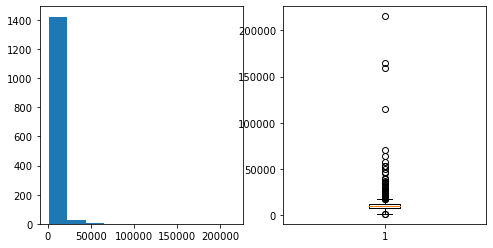

Biểu đồ phân phối của 1stFlrSF bằng Histogram và Boxplot


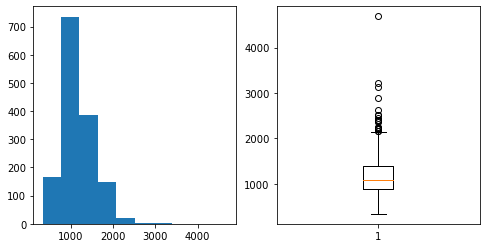

Biểu đồ phân phối của 2ndFlrSF bằng Histogram và Boxplot


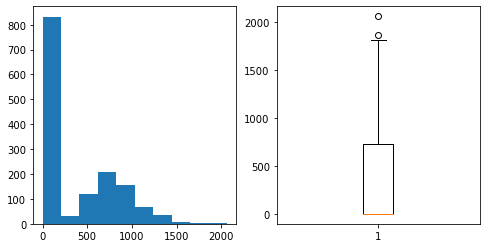

In [15]:
# Vẽ đồ thị gồm 2 phần: histogram và boxplot của biến.
data = ['LotArea', '1stFlrSF', '2ndFlrSF']
for i in data:
    print(f'Biểu đồ phân phối của {i} bằng Histogram và Boxplot')
    plot_data(df,i)

In [16]:
def summary_data(column_name):
    mean_data = df[column_name].mean()
    mode_data = stats.mode(df[column_name])[0][0]
    skew_data = stats.skew(df[column_name])
    kur_data = stats.kurtosis(df[column_name])
    return mean_data, mode_data, skew_data, kur_data

In [17]:
#Tìm mean, mode, độ nghiêng, độ nhọn --> Nhận xét có phân phối chuẩn không.
from scipy import stats
for i in data:
    print('########################################')
    print(f'mean, mode, độ nghiêng, độ nhọn của {i}')
    info = summary_data(i)
    print(f'Mean: {info[0]}')
    print(f'Mode: {info[1]}')
    print(f'Độ nghiêng: {info[2]}')
    if info[2] > 0:
        print('Ta thấy độ nghiêng >0 => phân phối lệch phải')
    else:
        print('Ta thấy độ nghiêng <0 => phân phối lệch trái')
    print(f'Độ nhọn: {info[3]}')
    if info[3] == 0:
        print('Đây là phân bố chuẩn')
    else:
        print('Đây không phải là phân phối chuẩn')
    print('\n')

########################################
mean, mode, độ nghiêng, độ nhọn của LotArea
Mean: 10516.828082191782
Mode: 7200
Độ nghiêng: 12.195142125084478
Ta thấy độ nghiêng >0 => phân phối lệch phải
Độ nhọn: 202.5437927513529
Đây không phải là phân phối chuẩn


########################################
mean, mode, độ nghiêng, độ nhọn của 1stFlrSF
Mean: 1162.626712328767
Mode: 864
Độ nghiêng: 1.3753417421837937
Ta thấy độ nghiêng >0 => phân phối lệch phải
Độ nhọn: 5.722076026587489
Đây không phải là phân phối chuẩn


########################################
mean, mode, độ nghiêng, độ nhọn của 2ndFlrSF
Mean: 346.99246575342465
Mode: 0
Độ nghiêng: 0.8121942731961613
Ta thấy độ nghiêng >0 => phân phối lệch phải
Độ nhọn: -0.5556767272864769
Đây không phải là phân phối chuẩn




Nếu không phải phân phối chuẩn: xác định Q1, Q3, IQR, Oulier Upper, Outlier Lower Nếu là phân phối chuẩn: xác định Oulier Upper, Outlier Lower theo Z-score

In [18]:
def boundary_data(column_name):
#     IQR = stats.iqr(df[column_name])
    Q1 = np.percentile(df[column_name], 25)
    Q3 = np.percentile(df[column_name], 75)
    IQR = Q3 - Q1
    Outlier_Upper = Q3 + (1.5 * IQR)
    Outlier_Lower = Q1 - (1.5 * IQR)
    return Q1, Q3, IQR, Outlier_Upper, Outlier_Lower

In [19]:
boundary_data_LotArea = boundary_data('LotArea')
boundary_data_1stFlrSF = boundary_data('1stFlrSF')
boundary_data_2ndFlrSF = boundary_data('2ndFlrSF')

In [20]:
def print_boundary_data(data, column_name):
    print('############################################################')
    print(f'Q1, Q3, IQR, Outlier_Upper, Outlier_Lower của {column_name}')
    print(f'Q1: {data[0]}')
    print(f'Q3: {data[1]}')
    print(f'IQR: {data[2]}')
    print(f'Outlier Upper: {data[3]}')
    print(f'Outlier Lower: {data[4]}')

In [21]:
print_boundary_data(boundary_data_LotArea, 'LotArea')
print_boundary_data(boundary_data_1stFlrSF, '1stFlrSF')
print_boundary_data(boundary_data_2ndFlrSF, '2ndFlrSF')

############################################################
Q1, Q3, IQR, Outlier_Upper, Outlier_Lower của LotArea
Q1: 7553.5
Q3: 11601.5
IQR: 4048.0
Outlier Upper: 17673.5
Outlier Lower: 1481.5
############################################################
Q1, Q3, IQR, Outlier_Upper, Outlier_Lower của 1stFlrSF
Q1: 882.0
Q3: 1391.25
IQR: 509.25
Outlier Upper: 2155.125
Outlier Lower: 118.125
############################################################
Q1, Q3, IQR, Outlier_Upper, Outlier_Lower của 2ndFlrSF
Q1: 0.0
Q3: 728.0
IQR: 728.0
Outlier Upper: 1820.0
Outlier Lower: -1092.0


Xác định tập dữ outlier trên và dưới.

In [22]:
def find_upper_outlier(column_name, outlier_upper):
    return [i for i in df[column_name] if i > outlier_upper]

def find_lower_outlier(column_name, outlier_lower):
    return [i for i in df[column_name] if i < outlier_lower]

In [23]:
upper_outlier_LotArea = find_upper_outlier('LotArea', boundary_data_LotArea[3])
lower_outlier_LotArea = find_lower_outlier('LotArea', boundary_data_LotArea[4])

upper_outlier_1stFlrSF = find_upper_outlier('1stFlrSF', boundary_data_1stFlrSF[3])
lower_outlier_1stFlrSF = find_lower_outlier('1stFlrSF', boundary_data_1stFlrSF[4])

upper_outlier_2ndFlrSF = find_upper_outlier('2ndFlrSF', boundary_data_2ndFlrSF[3])
lower_outlier_2ndFlrSF = find_lower_outlier('2ndFlrSF', boundary_data_2ndFlrSF[4])

In [24]:
for i in data:
    print('##########################')
    print(f'Tập outlier trên của {i}')
    print(eval(f'upper_outlier_{i}'))
    print('\n')
    print(f'Tập outlier dưới của {i}')
    print(eval(f'lower_outlier_{i}'))
    print('\n')

##########################
Tập outlier trên của LotArea
[50271, 19900, 21000, 21453, 19378, 31770, 22950, 25419, 159000, 19296, 39104, 19138, 18386, 215245, 164660, 20431, 18800, 53107, 34650, 22420, 21750, 70761, 53227, 40094, 32668, 21872, 21780, 25095, 46589, 20896, 18450, 21535, 26178, 115149, 21695, 53504, 21384, 28698, 45600, 17920, 25286, 27650, 24090, 25000, 21286, 21750, 29959, 18000, 23257, 17755, 35760, 18030, 35133, 32463, 18890, 24682, 23595, 17871, 36500, 63887, 20781, 25339, 57200, 20544, 19690, 21930, 26142]


Tập outlier dưới của LotArea
[1300, 1477]


##########################
Tập outlier trên của 1stFlrSF
[2207, 2223, 2259, 2158, 2234, 2392, 2402, 3228, 3138, 2515, 2444, 2217, 2364, 2898, 2524, 2411, 2196, 4692, 2156, 2633]


Tập outlier dưới của 1stFlrSF
[]


##########################
Tập outlier trên của 2ndFlrSF
[1872, 2065]


Tập outlier dưới của 2ndFlrSF
[]




Kiểm tra nếu tổng số các outlier nhỏ hơn 5% số phần tử tổng thể thì -->  xóa các outlier này khỏi tập dữ liệu.

In [25]:
df_filtered = df.copy()
def filter_outlier_in_df(df_filtered, column_name, upper_outlier, lower_outlier):
    if (len(upper_outlier) + len(lower_outlier)) / len(df_filtered[column_name]) * 100 < 5:
        df_filtered = df_filtered[(~df_filtered[column_name].isin(upper_outlier)) & (~df_filtered[column_name].isin(lower_outlier))]
    return df_filtered

In [26]:
# Filter LotArea
df_filtered = filter_outlier_in_df(df_filtered, 'LotArea', upper_outlier_LotArea, lower_outlier_LotArea)
df_filtered

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [27]:
# Filter 1stFlrSF
df_filtered = filter_outlier_in_df(df_filtered, '1stFlrSF', upper_outlier_1stFlrSF, lower_outlier_1stFlrSF)
df_filtered

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [28]:
# Filter 2ndFlrSF
df_filtered = filter_outlier_in_df(df_filtered, '2ndFlrSF', upper_outlier_2ndFlrSF, lower_outlier_2ndFlrSF)
df_filtered

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


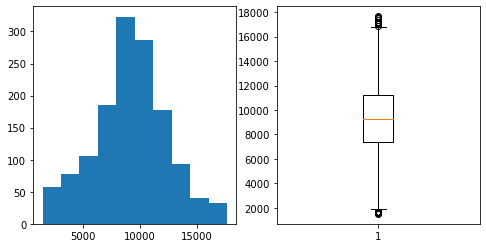

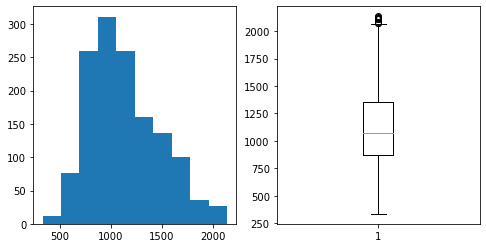

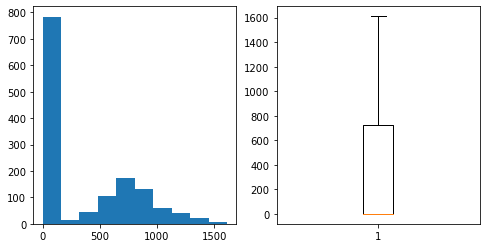

In [29]:
# Vẽ lại data sau khi filter outlier
for i in data:
    plot_data(df_filtered,i)

### 2.2. Với mỗi biến categorical hãy thực hiện các yêu cầu sau:
- Sử dụng groupby, count để đếm số các giá trị phân biệt có trong biến
- Vẽ đồ thị dạng bar plot với các dữ liệu nhận được. Nhận xét. 

#### Categorical Variables
- FullBath
- BedroomAbvGr
- TotRmsAbvGrd

In [30]:
data_2_2 = ['FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']

In [31]:
def bar_data(data_column):
    plt.bar(data_column.index, data_column)
    plt.show()

In [32]:
data_FullBath = df[data_2_2[0]].groupby(df[data_2_2[0]]).count()
data_BedroomAbvGr = df[data_2_2[1]].groupby(df[data_2_2[1]]).count()
data_TotRmsAbvGrd = df[data_2_2[2]].groupby(df[data_2_2[2]]).count()

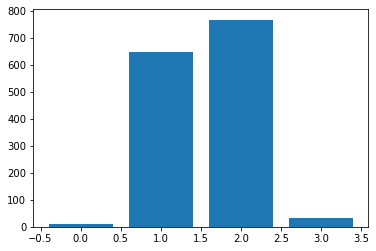

In [33]:
bar_data(data_FullBath)
#Char bar FullBath

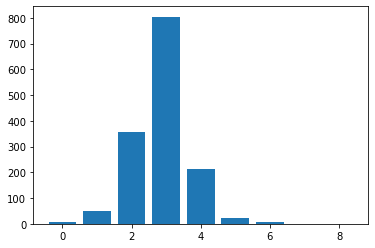

In [34]:
bar_data(data_BedroomAbvGr)
#Char bar BedroomAbvGr

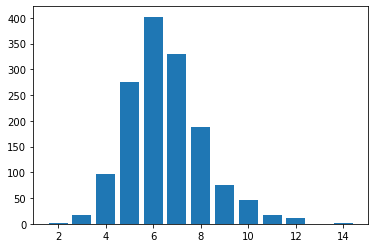

In [35]:
bar_data(data_TotRmsAbvGrd)
#Char bar TotRmsAbvGrd

- **Nhận xét: Dữ liệu tập trung tại center (Median, Mean)**
- **FullBath có 4 nhóm (0-1-2-3) nhiều nhất tại mode = 2**
- **BedroomAbvGr có 8 nhóm, nhiều nhất tại 3**
- **TotRmsAbvGrd có 12 nhóm, mode = 6**

## 3. Phân tích hai biến
### Continuous & Continous
- Sử dụng pairplot để vẽ dữ liệu có trong 3 biến ['LotArea', '1stFlrSF', '2ndFlrSF]
- Sử dụng hàm corr để tính độ tương quan của 3 biến này.
- Nhận xét mối liên hệ giữa các biến

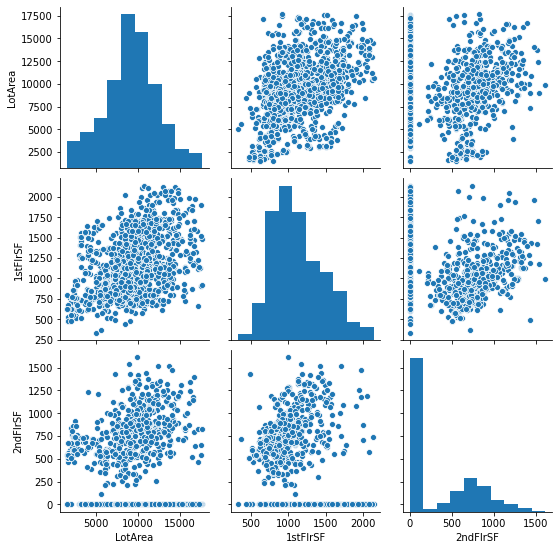

In [36]:
sns.pairplot(df_filtered[['LotArea', '1stFlrSF', '2ndFlrSF']])

In [37]:
df_filtered[['LotArea', '1stFlrSF', '2ndFlrSF']].corr()

,LotArea,1stFlrSF,2ndFlrSF
LotArea,1.000000,0.417124,0.104231
1stFlrSF,0.417124,1.000000,-0.260996
2ndFlrSF,0.104231,-0.260996,1.000000


**Nhận xét:** 
Các biến chỉ tương quan vừa hoặc yếu

LotArea tương quan vừa ~0.4 1stFlrSF

LotArea tương quan yếu ~0.1 2ndFlrSF

1stFlrSF tương quan nghịch yếu ~0.26 2ndFlrSF

### Categorical & Categorical
- 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd'
- Dùng Chi-square test để kiểm tra độ tương qua giữa các cặp biến: FullBath' và 'BedroomAbvGr', ...  .

In [38]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [39]:
def chi2_contigency_handle(table):
    stat, p, dof, expected = chi2_contingency(table)
    print(f'dof={dof}')
    print(expected)
    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print(f'probability={prob}, critical={critical}, stat={stat}')
    # Kiem tra qua Chi-square
    if abs(stat) >= critical:
        print('Dependent (Reject H0)')
        print('Có sự khác biệt giữa 2 nhóm')
    else:
        print('Independent (fail to reject H0) ==> 2 biến độc lập')

In [40]:
table = pd.crosstab(df_filtered['FullBath'],df_filtered['BedroomAbvGr'])
chi2_contigency_handle(table)

dof=21
[[2.03193033e-02 2.28592163e-01 1.75761974e+00 3.90130624e+00
  9.49927431e-01 1.01596517e-01 3.55587808e-02 5.07982583e-03]
 [1.82002903e+00 2.04753266e+01 1.57432511e+02 3.49445573e+02
  8.50863570e+01 9.10014514e+00 3.18505080e+00 4.55007257e-01]
 [2.09288824e+00 2.35449927e+01 1.81034833e+02 4.01834543e+02
  9.78425254e+01 1.04644412e+01 3.66255443e+00 5.23222061e-01]
 [6.67634253e-02 7.51088534e-01 5.77503628e+00 1.28185776e+01
  3.12119013e+00 3.33817126e-01 1.16835994e-01 1.66908563e-02]]
probability=0.95, critical=32.670573340917315, stat=636.3266505277618
Dependent (Reject H0)
Có sự khác biệt giữa 2 nhóm


In [41]:
table = pd.crosstab(df_filtered['FullBath'],df_filtered['TotRmsAbvGrd'])
chi2_contigency_handle(table)

dof=33
[[5.07982583e-03 8.12772134e-02 4.72423803e-01 1.34615385e+00
  1.99637155e+00 1.57474601e+00 8.94049347e-01 3.30188679e-01
  1.82873730e-01 8.12772134e-02 3.04789550e-02 5.07982583e-03]
 [4.55007257e-01 7.28011611e+00 4.23156749e+01 1.20576923e+02
  1.78817852e+02 1.41052250e+02 8.00812772e+01 2.95754717e+01
  1.63802612e+01 7.28011611e+00 2.73004354e+00 4.55007257e-01]
 [5.23222061e-01 8.37155298e+00 4.86596517e+01 1.38653846e+02
  2.05626270e+02 1.62198839e+02 9.20870827e+01 3.40094340e+01
  1.88359942e+01 8.37155298e+00 3.13933237e+00 5.23222061e-01]
 [1.66908563e-02 2.67053701e-01 1.55224964e+00 4.42307692e+00
  6.55950653e+00 5.17416546e+00 2.93759071e+00 1.08490566e+00
  6.00870827e-01 2.67053701e-01 1.00145138e-01 1.66908563e-02]]
probability=0.95, critical=47.39988391908093, stat=632.7853754393687
Dependent (Reject H0)
Có sự khác biệt giữa 2 nhóm


In [42]:
table = pd.crosstab(df_filtered['BedroomAbvGr'],df_filtered['TotRmsAbvGrd'])
chi2_contigency_handle(table)

dof=77
[[2.90275762e-03 4.64441219e-02 2.69956459e-01 7.69230769e-01
  1.14078374e+00 8.99854862e-01 5.10885341e-01 1.88679245e-01
  1.04499274e-01 4.64441219e-02 1.74165457e-02 2.90275762e-03]
 [3.26560232e-02 5.22496372e-01 3.03701016e+00 8.65384615e+00
  1.28338171e+01 1.01233672e+01 5.74746009e+00 2.12264151e+00
  1.17561684e+00 5.22496372e-01 1.95936139e-01 3.26560232e-02]
 [2.51088534e-01 4.01741655e+00 2.33512337e+01 6.65384615e+01
  9.86777939e+01 7.78374456e+01 4.41915820e+01 1.63207547e+01
  9.03918723e+00 4.01741655e+00 1.50653120e+00 2.51088534e-01]
 [5.57329463e-01 8.91727141e+00 5.18316401e+01 1.47692308e+02
  2.19030479e+02 1.72772134e+02 9.80899855e+01 3.62264151e+01
  2.00638607e+01 8.91727141e+00 3.34397678e+00 5.57329463e-01]
 [1.35703919e-01 2.17126270e+00 1.26204644e+01 3.59615385e+01
  5.33316401e+01 4.20682148e+01 2.38838897e+01 8.82075472e+00
  4.88534107e+00 2.17126270e+00 8.14223512e-01 1.35703919e-01]
 [1.45137881e-02 2.32220610e-01 1.34978229e+00 3.84615385e

### Categorical & Continuous
- Có quan hệ giữa 'FullBath' và 'LotArea'? ('FullBath' có bị ảnh hưởng bởi'LotArea'?).
- Dùng biểu đồ boxplot của Seaborn để vẽ biểu đồ giữa 2 biến (x="FullBath", y="LotArea") 
- Dùng ANOVA one way.
- Dùng Tukey HSD nhận xét về mối quan hệ (nếu có).

**'FullBath' có bị ảnh hưởng bởi'LotArea' => Có**

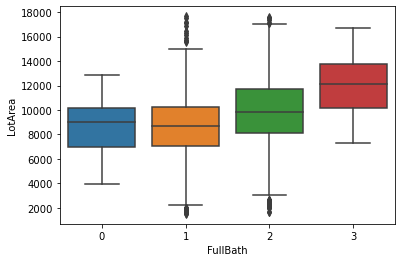

In [43]:
sns.boxplot(x='FullBath',y='LotArea',data=df_filtered[['FullBath','LotArea']])
plt.show()

In [44]:
# fvalue pvalue = stats.f_oneway()
unique_data = df_filtered['FullBath'].unique()
for i in unique_data:
    print(i)

2
1
3
0


In [45]:
df_LotArea_0 = df_filtered[(df_filtered['FullBath'] == 0)]['LotArea']
df_LotArea_1 = df_filtered[(df_filtered['FullBath'] == 1)]['LotArea']
df_LotArea_2 = df_filtered[(df_filtered['FullBath'] == 2)]['LotArea']
df_LotArea_3 = df_filtered[(df_filtered['FullBath'] == 3)]['LotArea']

In [46]:
# Kiểm tra Levene
w, pvalue = stats.levene(df_LotArea_0, df_LotArea_1, df_LotArea_2, df_LotArea_3)
print(w, pvalue)

2.1227211531562635 0.09552780077858886


pvalue > 0.05 => Không bác bỏ null hypotesis. Các mẫu từ các quần thể có thể có phương sai bằng nhau

In [47]:
# Anova 1 way
f_value, p_value = stats.f_oneway(df_LotArea_0, df_LotArea_1, df_LotArea_2, df_LotArea_3)
print(f_value, p_value)

20.63119543842933 4.4583316171910085e-13


Giá trị P-value thu được từ phân tích Anova là đáng kể (P < 0.05) và do đó kết luận có sự khác biệt đáng kể giữa các FullBath

In [48]:
# Kiểm tra xác định mối quan hệ giữa các nhoms
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df_filtered['LotArea'], 
                           groups=df_filtered['FullBath'], 
                           alpha=0.05)
print(m_comp)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
     0      1   16.1112    0.9  -3022.063 3054.2853  False
     0      2 1105.9376 0.7593 -1930.0491 4141.9243  False
     0      3 3547.0373 0.0412    96.4063 6997.6682   True
     1      2 1089.8264  0.001   653.3162 1526.3366   True
     1      3 3530.9261  0.001  1833.8168 5228.0354   True
     2      3 2441.0997 0.0012   747.9095 4134.2899   True
----------------------------------------------------------


- **Ngoại trừ nhóm 0, 1 và 0, 2**

- **Tất cả nhóm còn lại điều có sự khác biệt đáng kể về mặt thống kê**

- **Có quan hệ giữa nhóm FullBath và LotArea**

## 4. Xử lý dữ liệu thiếu
- Kiểm tra xem có cột nào chứa dữ liệu null không

In [49]:
column_null = []
for i in df.columns:
    if df[i].isnull().any():
        column_null.append(i)
print('số lượng columns không chứa dữ liệu ', len(column_null))
print('Những column có chứa dữ liệu null')
print(column_null)

số lượng columns không chứa dữ liệu  19
Những column có chứa dữ liệu null
['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


**Cảm ơn Thầy thời gian vừa qua đã giúp đỡ.**